---
# Эксперименты на синтетическом сгенерированном наборе
---

TODO
- генерация из sklearn готовой функцией, сравнение результатов
  [7.3. Generated datasets](https://scikit-learn.org/stable/datasets/sample_generators.html)

## Создадим несколько кластеров из случайных значений вокруг заданной точки. Реализуем собственный метод - точки лежат в кругу с заданным центром и радиусом

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rng = np.random.default_rng(318)

In [48]:
def make_cluster(x, y, radius, size: int, num_cluster: int = 0) -> pd.core.frame.DataFrame:
    """
    создать кластер из size точек с центром x,y, радиусом radius и номером num_cluster
    :return:
    """
    fi = np.random.random_sample(size=size)
    r = np.random.random_sample(size=size)
    data = pd.DataFrame(np.array([np.cos(2 * np.pi * fi) * radius * r + x,
                                  np.sin(2 * np.pi * fi) * radius * r + y]).T,
                        columns=['x', 'y'])
    data['target'] = num_cluster
    return data

In [49]:
clusters_param = [{'x':10, 'y':20, 'radius':5, 'size':100, 'num_cluster':0},
                  {'x':22, 'y':25, 'radius':4, 'size':150, 'num_cluster':1}]

In [50]:
df = pd.DataFrame([],  columns=['x', 'y', 'target'])
for cluster in clusters_param:
    df = pd.concat([df, make_cluster(**cluster)], ignore_index=True)

Вычислим центроиды для кластеров. Должны примерно совпадать с заданными x и у при создании

In [51]:
print(f"Заданные центры генерации кластеров:")
print([[claster['x'], claster['y']] for claster in clusters_param])
f_for_print = lambda cluster: list(df[df['target'] == cluster].drop(labels=['target'], axis=1).mean(axis=0).round(1))
print(f"Вычисленные центроиды кластеров:")
print([f_for_print(claster['num_cluster']) for claster in clusters_param])

Заданные центры генерации кластеров:
[[10, 20], [22, 25]]
Вычисленные центроиды кластеров:
[[10.3, 19.9], [22.0, 25.2]]


In [52]:
# ws = pd.DataFrame([f_for_print(claster['num_cluster']) for claster in clasters_param], columns=['x', 'y', ])
# ws['type'] = 1
# ws
df_clasters = pd.DataFrame([[claster['x'], claster['y'], 0] for claster in clusters_param], columns=['x', 'y', 'type'])
df_clasters

,x,y,type
0,10,20,0
1,22,25,0


<AxesSubplot: title={'center': 'Сгенерированные кластеры'}, xlabel='x', ylabel='y'>

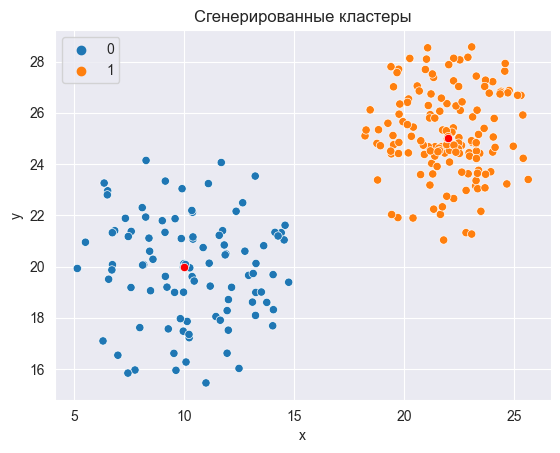

In [53]:
sns.scatterplot(data=df, x='x', y='y', hue='target').set(title='Сгенерированные кластеры')
sns.scatterplot(data=df_clasters, x='x', y='y', color='r')

## Получим тот же результат, используя sklearn [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

In [54]:
from sklearn.datasets import make_blobs

In [55]:
# Преобразуем список словарей параметров в словарь списков
params = {key: [val[key] for val in clusters_param] for key in clusters_param[0]}
params['labels'] = ['ann', 'eugene']
params

{'x': [10, 22],
 'y': [20, 25],
 'radius': [5, 4],
 'size': [100, 150],
 'num_cluster': [0, 1],
 'labels': ['ann', 'eugene']}

In [56]:
X, y, centers = make_blobs(n_samples=params['size'], n_features=2, centers=np.array([params['x'], params['y']]).T, cluster_std=(np.array(params['radius']) / 3), shuffle=True, random_state=200, return_centers=True)
centers

array([[10, 20],
       [22, 25]])

In [57]:
df_clasters

,x,y,type
0,10,20,0
1,22,25,0


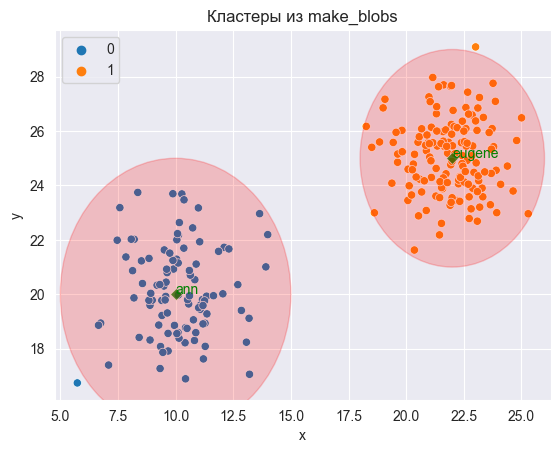

In [61]:
sns.scatterplot(data=X, x=X[:, 0], y=X[:, 1], hue=y).set(title='Кластеры из make_blobs')
ax = sns.scatterplot(data=pd.DataFrame(centers, columns=['x', 'y']), x='x', y='y', color='g', marker='D', alpha=0.8)
for cl in range(len(params['radius'])):
    ax.add_patch(plt.Circle(xy=(params['x'][cl], params['y'][cl]), radius=params['radius'][cl], color='red', fill=True, alpha=0.2))
    plt.text(x=params['x'][cl], y=params['y'][cl], s=params['labels'][cl], color='g')